<a href="https://colab.research.google.com/github/nesrine-ach/British-Airways-Data-Science/blob/main/BA_theforage_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task2: Predictive modeling of customer bookings

### Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.describe(include='all')

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000,50000,50000.000000,50000.00000,50000.00000,50000.000000,50000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,799,104,NaN,NaN,NaN,NaN,NaN
top,NaN,Internet,RoundTrip,NaN,NaN,NaN,NaN,AKLKUL,Australia,NaN,NaN,NaN,NaN,NaN
freq,NaN,44382,49497,NaN,NaN,NaN,NaN,2680,17872,NaN,NaN,NaN,NaN,NaN
mean,1.591240,NaN,NaN,84.940480,23.04456,9.06634,3.814420,NaN,NaN,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,NaN,NaN,90.451378,33.88767,5.41266,1.992792,NaN,NaN,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,NaN,NaN,0.000000,0.00000,0.00000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,NaN,NaN,21.000000,5.00000,5.00000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,NaN,NaN,51.000000,17.00000,9.00000,4.000000,NaN,NaN,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,NaN,NaN,115.000000,28.00000,13.00000,5.000000,NaN,NaN,1.000000,1.000000,1.000000,8.830000,0.000000


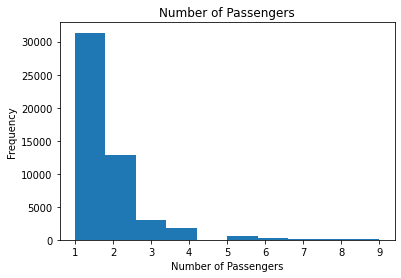

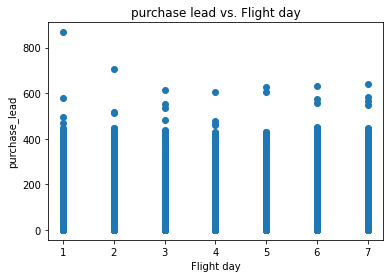

In [8]:
# Histogram
plt.hist(df["num_passengers"])
plt.title("Number of Passengers")
plt.xlabel("Number of Passengers")
plt.ylabel("Frequency")
plt.show()

# Scatter plot
plt.scatter(x="flight_day", y="purchase_lead", data=df)
plt.title("purchase lead vs. Flight day")
plt.xlabel("Flight day")
plt.ylabel("purchase_lead")
plt.show()

### Data preprocessing

In [9]:
# Preprocess the data

imputer = SimpleImputer(strategy="median")
encoder = OneHotEncoder()

num_features = ["num_passengers", "length_of_stay", "flight_hour", "flight_day", "flight_duration"]
cat_features = ["sales_channel", "trip_type", "route", "booking_origin"]

num_pipeline = Pipeline([
    ("imputer", imputer)
])

cat_pipeline = Pipeline([
    ("encoder", encoder)
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

X = df.drop("booking_complete", axis=1)
y = df["booking_complete"]

X_preprocessed = preprocessor.fit_transform(X)

### ML model

In [10]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


In [11]:
# Train the model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print(f"F1 score: {f1:.2f}")


Accuracy: 0.85
Precision: 0.45
Recall: 0.19
F1 score: 0.27


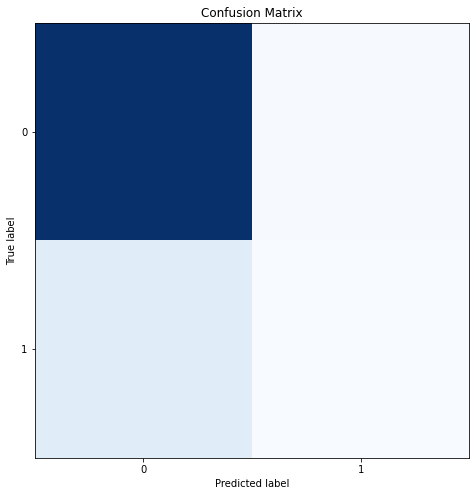

In [13]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as an image
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap=plt.cm.Blues)
classes = np.unique(y_test)
ax.set_xticks(np.arange(len(classes)))
ax.set_yticks(np.arange(len(classes)))
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')
ax.set_title('Confusion Matrix')
plt.show()

### Feature importances

In [14]:
# Calculate the feature importances
feature_names = list(df.columns)
importances = clf.feature_importances_

importances = importances[:len(feature_names)]

# Combine the feature names and importances into a dataframe
feature_importances = pd.DataFrame({"feature": feature_names, "importance": importances})

# Sort the dataframe by importance scores in descending order
feature_importances = feature_importances.sort_values("importance", ascending=False)

# Print the feature importances
print(feature_importances)

                  feature  importance
2               trip_type    0.230331
1           sales_channel    0.187008
3           purchase_lead    0.134950
0          num_passengers    0.067188
4          length_of_stay    0.029271
6              flight_day    0.004268
5             flight_hour    0.004259
9     wants_extra_baggage    0.000904
8          booking_origin    0.000688
7                   route    0.000240
13       booking_complete    0.000108
10   wants_preferred_seat    0.000014
11  wants_in_flight_meals    0.000004
12        flight_duration    0.000002


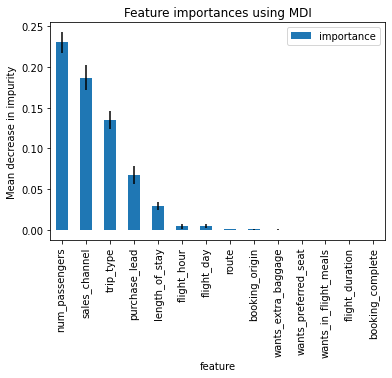

In [15]:
importances_mean = []
importances_std = []

# Calculate the mean and standard deviation of feature importances for each feature
for i in range(len(feature_names)):
    importances_i = [tree.feature_importances_[i] for tree in clf.estimators_]
    importances_mean.append(np.mean(importances_i))
    importances_std.append(np.std(importances_i))

# Create a dataframe of feature names and importances
feature_importances = pd.DataFrame({"feature": feature_names, "importance": importances_mean})

# Sort the dataframe by importance scores in descending order
feature_importances = feature_importances.sort_values("importance", ascending=False)

# Plot the feature importances with error bars
fig, ax = plt.subplots()
feature_importances.plot.bar(x="feature", y="importance", yerr=importances_std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.set_xticklabels(feature_names, rotation=90)
plt.show()